Nia Khairunnisa | 23083010027

Tugas 1

Kelas Analisis Data Eksploratif

# Mencari Missing Value,Data Outlier dan Transformasi Data

In [118]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [120]:
# Membaca data file csv
df = pd.read_csv(r"C:\Users\HP\OneDrive\Documents\Tugas Kuuuu\Semester 3\Analisis Data Eksploratif\dataset_Student_performance.csv")
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [121]:
# Menampilkan informasi tentang data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [122]:
# Memeriksa missing value di setiap kolom
missing_values = df.isnull().sum()

# Menampilkan jumlah missing value di setiap kolom
print(missing_values)

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64


In [123]:
# Memeriksa kategori unik di kolom kategori
print("Kategori unik dalam kolom 'Ethnicity':", df['Ethnicity'].unique())
print("Kategori unik dalam kolom 'ParentalEducation':", df['ParentalEducation'].unique())


Kategori unik dalam kolom 'Ethnicity': [0 2 1 3]
Kategori unik dalam kolom 'ParentalEducation': [2 1 3 4 0]


In [124]:
# Menampilkan kolom yang dianggap kategori (baik bertipe object maupun numerik)
categorical_columns = ['Ethnicity', 'ParentalEducation']  # Ganti dengan kolom kategori numerik Anda
print("Kolom dengan tipe data kategorik:", categorical_columns)

for col in categorical_columns:
    print(f"\nKategori unik dalam kolom '{col}': {df[col].unique()}")


Kolom dengan tipe data kategorik: ['Ethnicity', 'ParentalEducation']

Kategori unik dalam kolom 'Ethnicity': [0 2 1 3]

Kategori unik dalam kolom 'ParentalEducation': [2 1 3 4 0]


In [125]:
# Membuat dummy variabel dari kolom kategori yaitu 'Ethnicity' dan 'ParentalEducation'
df_dummy = pd.get_dummies(df, columns=['Ethnicity', 'ParentalEducation'], drop_first=True)

# Lihat data dengan dummy variabel
print(df_dummy.head())

# Simpan hasil ke file CSV baru
output_path = 'C:/Users/HP/OneDrive/Documents/Tugas Kuuuu/Semester 3/Analisis Data Eksploratif/archive (14)/Student_performance_data _.csv'
df_dummy.to_csv(output_path, index=False)

print("Dummy variabel berhasil dibuat dan disimpan ke:", output_path)

   StudentID  Age  Gender  StudyTimeWeekly  Absences  Tutoring  \
0       1001   17       1        19.833723         7         1   
1       1002   18       0        15.408756         0         0   
2       1003   15       0         4.210570        26         0   
3       1004   17       1        10.028829        14         0   
4       1005   17       1         4.672495        17         1   

   ParentalSupport  Extracurricular  Sports  Music  Volunteering       GPA  \
0                2                0       0      1             0  2.929196   
1                1                0       0      0             0  3.042915   
2                2                0       0      0             0  0.112602   
3                3                1       0      0             0  2.054218   
4                3                0       0      0             0  1.288061   

   GradeClass  Ethnicity_1  Ethnicity_2  Ethnicity_3  ParentalEducation_1  \
0         2.0            0            0            0     

In [126]:
# Menampilkan beberapa data setelah dilakukan dummy pada data
display(df_dummy.head())

# Menampilkan informasi tentang data setelah dilakukan dummy
print(df_dummy.info())

,StudentID,Age,Gender,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass,Ethnicity_1,Ethnicity_2,Ethnicity_3,ParentalEducation_1,ParentalEducation_2,ParentalEducation_3,ParentalEducation_4
0,1001,17,1,19.833723,7,1,2,0,0,1,0,2.929196,2.0,0,0,0,0,1,0,0
1,1002,18,0,15.408756,0,0,1,0,0,0,0,3.042915,1.0,0,0,0,1,0,0,0
2,1003,15,0,4.210570,26,0,2,0,0,0,0,0.112602,4.0,0,1,0,0,0,1,0
3,1004,17,1,10.028829,14,0,3,1,0,0,0,2.054218,3.0,0,0,0,0,0,1,0
4,1005,17,1,4.672495,17,1,3,0,0,0,0,1.288061,4.0,0,0,0,0,1,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   StudentID            2392 non-null   int64  
 1   Age                  2392 non-null   int64  
 2   Gender               2392 non-null   int64  
 3   StudyTimeWeekly      2392 non-null   float64
 4   Absences             2392 non-null   int64  
 5   Tutoring             2392 non-null   int64  
 6   ParentalSupport      2392 non-null   int64  
 7   Extracurricular      2392 non-null   int64  
 8   Sports               2392 non-null   int64  
 9   Music                2392 non-null   int64  
 10  Volunteering         2392 non-null   int64  
 11  GPA                  2392 non-null   float64
 12  GradeClass           2392 non-null   float64
 13  Ethnicity_1          2392 non-null   uint8  
 14  Ethnicity_2          2392 non-null   uint8  
 15  Ethnicity_3          2392 non-null   u

In [127]:
# Mengidentifikasi kolom numerik
numerical_columns = df.select_dtypes(include=[np.number]).columns
print("Kolom numerik:", numerical_columns)

Kolom numerik: Index(['StudentID', 'Age', 'Gender', 'Ethnicity', 'ParentalEducation',
       'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport',
       'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA',
       'GradeClass'],
      dtype='object')


In [133]:
# Mencari outlier menggunakan metode IQR
def find_outliers_iqr(df):
    outliers = {}
    for col in numerical_columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier_data = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        
        if not outlier_data.empty:  
            outliers[col] = outlier_data
            print(f'Outlier pada kolom {col}:')
            display(outliers[col]) 

    return outliers

# Mencari outlier
outliers = find_outliers_iqr(df)

# Mengecek jika ada outlier
if outliers:
    print("Outlier ditemukan.")
else:
    print("Tidak ada outlier.")

Outlier pada kolom ParentalEducation:


,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
7,1008,15,1,1,4,15.424496,22,1,1,1,0,0,0,1.360143,4.0
23,1024,18,1,3,4,18.946138,20,0,2,1,0,0,0,1.770132,4.0
56,1057,18,1,0,4,0.921383,20,0,2,0,1,1,0,1.342387,4.0
57,1058,15,0,0,4,10.877558,29,0,3,1,0,0,0,0.286571,4.0
66,1067,18,0,0,4,2.395199,23,0,3,0,1,0,0,1.039624,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2178,3179,17,1,1,4,1.564842,14,0,1,0,1,0,0,1.795369,3.0
2238,3239,18,0,0,4,9.356048,9,1,3,0,0,0,0,2.622328,4.0
2243,3244,16,1,3,4,10.349220,15,0,3,1,1,0,1,2.192415,4.0
2318,3319,17,0,0,4,12.941403,9,0,2,1,0,1,1,2.596111,2.0


Outlier pada kolom Music:


,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
19,1020,17,0,0,1,10.835206,9,0,2,0,0,1,0,2.395784,3.0
25,1026,16,1,0,3,2.710337,5,0,4,0,0,1,0,2.977852,2.0
27,1028,16,1,0,3,2.252185,8,0,3,0,0,1,0,2.145205,3.0
45,1046,18,0,0,2,4.894312,7,0,4,0,0,1,0,2.515300,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2367,3368,15,1,3,1,9.381207,18,0,3,0,0,1,0,1.454723,1.0
2368,3369,15,0,0,4,6.682728,3,0,2,0,0,1,1,3.158592,1.0
2375,3376,18,0,0,2,18.925290,24,0,1,1,0,1,1,1.164539,0.0
2378,3379,15,1,0,2,12.905555,26,0,2,0,0,1,1,0.709353,3.0


Outlier pada kolom Volunteering:


,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
8,1009,17,0,0,0,4.562008,1,0,2,0,1,0,1,2.896819,2.0
11,1012,17,0,0,1,7.598486,15,0,2,0,0,0,1,1.559595,4.0
18,1019,18,0,1,3,16.254658,29,0,2,1,0,0,1,0.469553,4.0
20,1021,16,1,0,3,2.621597,2,0,3,0,0,0,1,2.778411,2.0
31,1032,15,0,0,3,8.132731,17,0,4,0,0,0,1,1.847535,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2371,3372,18,1,0,3,0.668760,8,0,2,0,0,0,1,1.934762,3.0
2375,3376,18,0,0,2,18.925290,24,0,1,1,0,1,1,1.164539,0.0
2378,3379,15,1,0,2,12.905555,26,0,2,0,0,1,1,0.709353,3.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0


Outlier ditemukan.


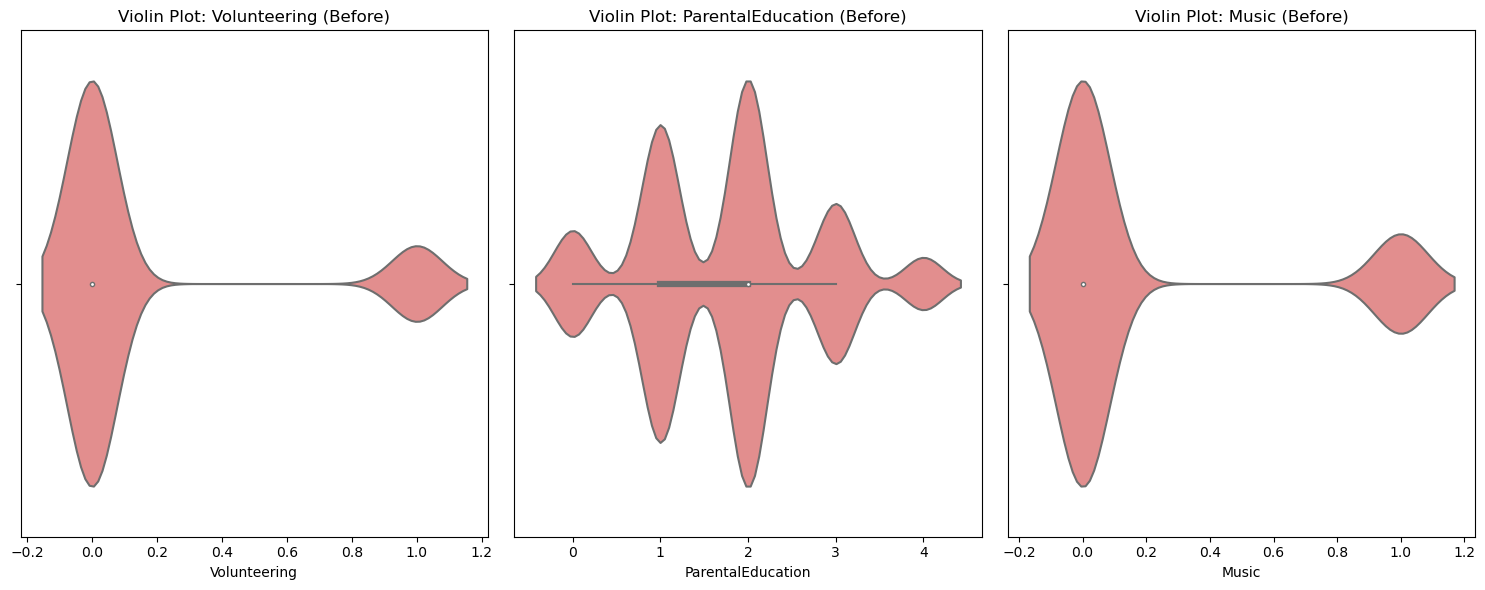

In [135]:
# Membuat violin plot untuk kolom 'Volunteering', 'ParentalEducation', dan 'Music'
plt.figure(figsize=(15, 6))

# List untuk kolom yang ingin ditampilkan
selected_columns = ['Volunteering', 'ParentalEducation', 'Music']

# Loop melalui kolom yang dipilih
for i, col in enumerate(selected_columns, 1):
    plt.subplot(1, len(selected_columns), i)
    sns.violinplot(x=df[col], color='lightcoral')  # Atur warna sesuai keinginan
    plt.title(f'Violin Plot: {col} (Before)')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

In [136]:
# Menghapus outlier dari dataset
for col in outliers:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Mengganti outlier dengan NaN
    df[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound), np.nan, df[col])

# Mengganti outlier yang sudah diubah menjadi NaN dengan median
for col in outliers:
    median = df[col].median()
    df[col].fillna(median, inplace=True)

# Menampilkan hasil
print("Data setelah penghapusan outlier dan penggantian dengan median:")
print(df[numerical_columns].head())

Data setelah penghapusan outlier dan penggantian dengan median:
   StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0       1001   17       1          0                2.0        19.833723   
1       1002   18       0          0                1.0        15.408756   
2       1003   15       0          2                3.0         4.210570   
3       1004   17       1          0                3.0        10.028829   
4       1005   17       1          0                2.0         4.672495   

   Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
0         7         1                2                0       0    0.0   
1         0         0                1                0       0    0.0   
2        26         0                2                0       0    0.0   
3        14         0                3                1       0    0.0   
4        17         1                3                0       0    0.0   

   Volunteering       GPA  GradeCl

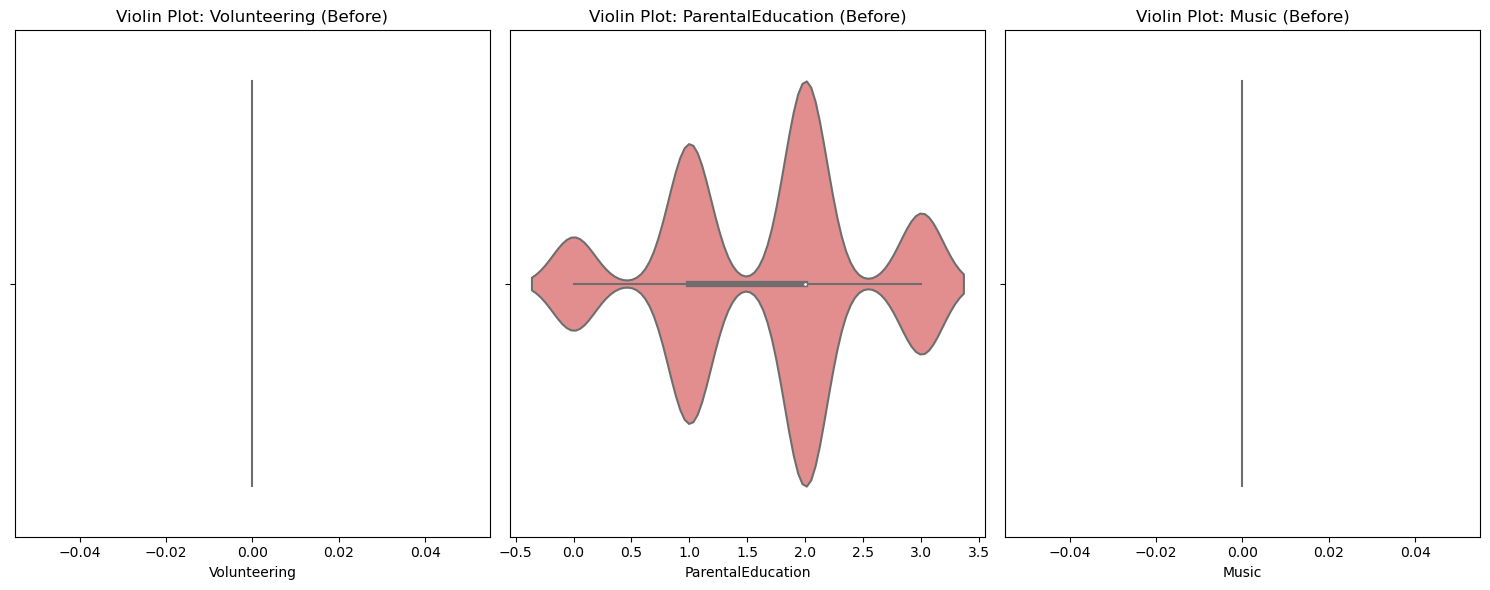

In [137]:
# Data setelah dilakukan penghapusan outlier
# Membuat violin plot untuk kolom 'Volunteering', 'ParentalEducation', dan 'Music'
plt.figure(figsize=(15, 6))

# List untuk kolom yang ingin ditampilkan
selected_columns = ['Volunteering', 'ParentalEducation', 'Music']

# Loop melalui kolom yang dipilih
for i, col in enumerate(selected_columns, 1):
    plt.subplot(1, len(selected_columns), i)
    sns.violinplot(x=df[col], color='lightcoral')  # Atur warna sesuai keinginan
    plt.title(f'Violin Plot: {col} (Before)')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

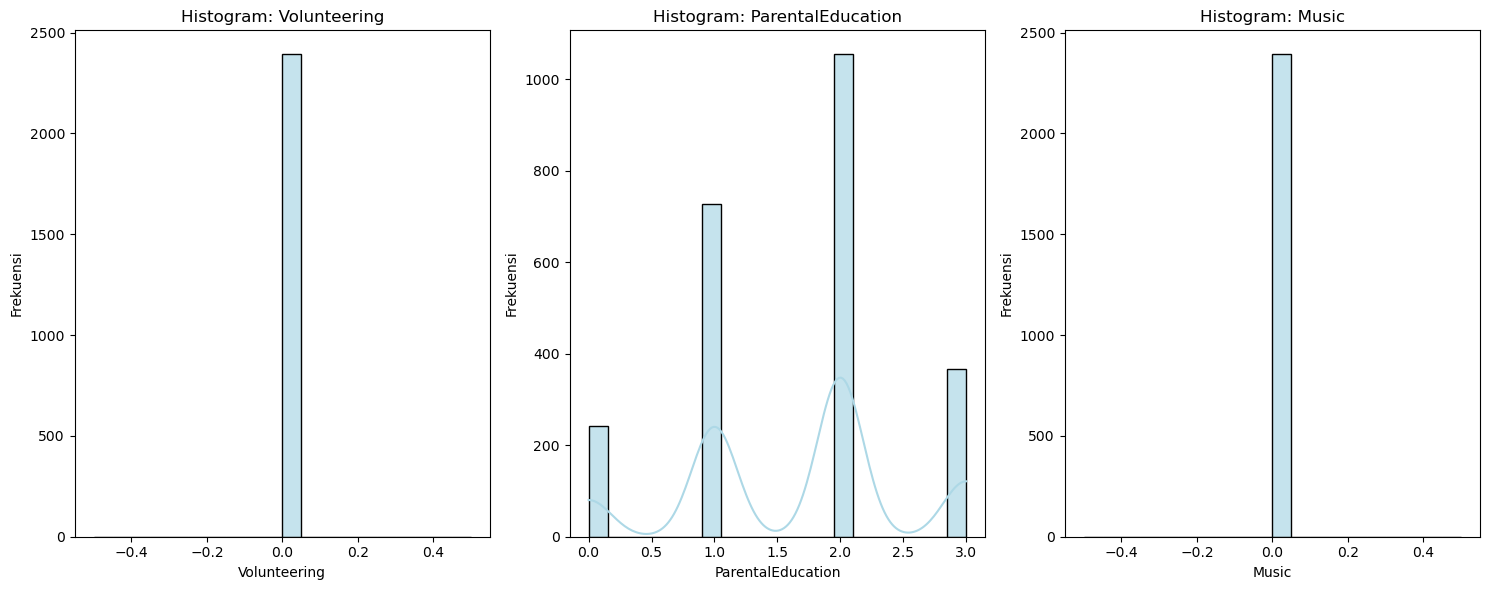

In [139]:
# Memilih kolom untuk divisualisasikan
selected_columns = ['Volunteering', 'ParentalEducation', 'Music']

# Membuat histogram
plt.figure(figsize=(15, 6))

# Loop melalui kolom yang dipilih
for i, col in enumerate(selected_columns, 1):
    plt.subplot(1, len(selected_columns), i)
    sns.histplot(df[col], bins=20, kde=True, color='lightblue', alpha=0.7)  # Histogram dengan KDE
    plt.title(f'Histogram: {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()